In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
from google.colab import files
uploaded = files.upload()

Saving GBvideos.csv to GBvideos.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GB_category_id.json to GB_category_id.json


In [3]:
GB = pd.read_csv('GBvideos.csv')

In [ ]:
GB.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [ ]:
GB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                38916 non-null  object
 1   trending_date           38916 non-null  object
 2   title                   38916 non-null  object
 3   channel_title           38916 non-null  object
 4   category_id             38916 non-null  int64 
 5   publish_time            38916 non-null  object
 6   tags                    38916 non-null  object
 7   views                   38916 non-null  int64 
 8   likes                   38916 non-null  int64 
 9   dislikes                38916 non-null  int64 
 10  comment_count           38916 non-null  int64 
 11  thumbnail_link          38916 non-null  object
 12  comments_disabled       38916 non-null  bool  
 13  ratings_disabled        38916 non-null  bool  
 14  video_error_or_removed  38916 non-null  bool  
 15  de

In [ ]:
GB.describe()

,category_id,views,likes,dislikes,comment_count
count,38916.000000,3.891600e+04,3.891600e+04,3.891600e+04,3.891600e+04
mean,16.827937,5.911944e+06,1.345196e+05,7.612560e+03,1.308835e+04
std,7.752728,1.900121e+07,3.499893e+05,5.095683e+04,5.066740e+04
min,1.000000,8.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,10.000000,2.515272e+05,5.897000e+03,2.000000e+02,6.790000e+02
50%,20.000000,9.818890e+05,2.518250e+04,8.210000e+02,2.478000e+03
75%,24.000000,3.683628e+06,1.140892e+05,3.357500e+03,9.241500e+03
max,43.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


In [ ]:
print("Shape of the dataset:", GB.shape)

Shape of the dataset: (38916, 16)


#Data integrity

In [ ]:
print(GB.dtypes)

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object


In [ ]:
GB['trending_date'] = pd.to_datetime(GB['trending_date'], format='%y.%d.%m')
GB['publish_time'] = pd.to_datetime(GB['publish_time'])


#Handling missing values and duplicates

In [ ]:
print(GB.isnull().sum())

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               612
dtype: int64


In [ ]:
GB.dropna(subset=['description'], inplace=True)

In [ ]:
print(GB.isnull().sum())

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64


In [ ]:
duplicates = GB.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 167


In [ ]:
GB = GB.drop_duplicates()

In [ ]:
duplicates = GB.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [ ]:
with open('GB_category_id.json', 'r') as f:
    GB_json = json.load(f)

In [ ]:
GB_json = pd.DataFrame(GB_json) # Convert dictionary to dataframe

GB_json.head()


,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [ ]:
print(GB_json.columns)

Index(['kind', 'etag', 'items'], dtype='object')


In [ ]:
# Convert JSON to a DataFrame
categories_df = pd.DataFrame(GB_json["items"])

# Extract relevant data into separate columns
categories_df = pd.DataFrame(list(categories_df['items']))
categories_df = categories_df[["id", "snippet"]].copy()
categories_df["category_name"] = categories_df["snippet"].apply(lambda x: x["title"])
categories_df = categories_df[["id", "category_name"]].copy()
categories_df.rename(columns={"id": "category_id"}, inplace=True)
categories_df["category_id"] = categories_df["category_id"].astype(str)


if 'category_id' not in GB.columns:
    if 'id' in GB.columns:
        GB.rename(columns={'id': 'category_id'}, inplace=True)

    else:
        print(f"Error: Column named 'category_id' or similar is missing in the GB DataFrame")
        print(f"Existing GB columns: {GB.columns.to_list()}")

GB["category_id"] = GB["category_id"].astype(str)

GB = GB.merge(categories_df, on='category_id', how='left')

GB.drop(columns=['category_id'], inplace=True)

print(GB.head())

      video_id trending_date  \
0  Jw1Y-zhQURU    2017-11-14   
1  3s1rvMFUweQ    2017-11-14   
2  n1WpP7iowLc    2017-11-14   
3  PUTEiSjKwJU    2017-11-14   
4  rHwDegptbI4    2017-11-14   

                                               title  \
0      John Lewis Christmas Ad 2017 - #MozTheMonster   
1          Taylor Swift: …Ready for It? (Live) - SNL   
2         Eminem - Walk On Water (Audio) ft. Beyoncé   
3  Goals from Salford City vs Class of 92 and Fri...   
4  Dashcam captures truck's near miss with child ...   

                channel_title              publish_time  \
0                  John Lewis 2017-11-10 07:38:29+00:00   
1         Saturday Night Live 2017-11-12 06:24:44+00:00   
2                  EminemVEVO 2017-11-10 17:00:03+00:00   
3  Salford City Football Club 2017-11-13 02:30:38+00:00   
4            Cute Girl Videos 2017-11-13 01:45:13+00:00   

                                                tags     views   likes  \
0  christmas|"john lewis christmas"|"john

<ipython-input-22-9a00abfac384>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GB["category_id"] = GB["category_id"].astype(str) # This ensures both dataframes have matching data types for "category_id"


In [ ]:
GB_count_df = pd.DataFrame(GB.groupby("category_name").count(), columns=["video_id"])
GB_count_df = GB_count_df.rename(columns={"video_id": "count"})
GB_count_df

,count
category_name,
Autos & Vehicles,144
Comedy,1794
Education,457
Entertainment,8911
Film & Animation,2542
Gaming,1751
Howto & Style,1921
Music,13605
News & Politics,1157


In [ ]:
group_by_category = GB.groupby('category_name')
likes_count = group_by_category['likes'].sum()
likes_count


,likes
category_name,
Autos & Vehicles,3543625
Comedy,142727838
Education,17567394
Entertainment,718773602
Film & Animation,146523845
Gaming,69398188
Howto & Style,51321760
Music,3720257716
News & Politics,30061361


In [ ]:
dislikes_count = group_by_category['dislikes'].sum()
dislikes_count

,dislikes
category_name,
Autos & Vehicles,281190
Comedy,4599729
Education,593153
Entertainment,65067374
Film & Animation,6150291
Gaming,2268136
Howto & Style,1606041
Music,158376636
News & Politics,3635374


In [ ]:
comment_count = group_by_category['comment_count'].sum()
comment_count

,comment_count
category_name,
Autos & Vehicles,505085
Comedy,16645189
Education,1636903
Entertainment,96822539
Film & Animation,15512396
Gaming,6090878
Howto & Style,7348843
Music,290956680
News & Politics,9235450


In [ ]:
views_count = group_by_category['views'].sum()
views_count

,views
category_name,
Autos & Vehicles,214184514
Comedy,3918103443
Education,444290557
Entertainment,29023716302
Film & Animation,8309101176
Gaming,1707609271
Howto & Style,1189283231
Music,170329299669
News & Politics,1372655833


#Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['views', 'likes', 'dislikes', 'comment_count']

scaler = StandardScaler()

GB[numerical_cols] = scaler.fit_transform(GB[numerical_cols])

In [ ]:
GB['trending_date'] = pd.to_datetime(GB['trending_date'], errors='coerce')

# Extract year, month, and day into separate columns
GB['trending_year'] = GB['trending_date'].dt.year
GB['trending_month'] = GB['trending_date'].dt.month
GB['trending_day'] = GB['trending_date'].dt.day

#Outlier detection

The method chosen to identify outliers is the standard deviation method. After identifying, the IQR method will be employed to addressed the outliers because it handles outliers based on the spread of the data. After addressing the outliers, a box plot will be used to visualize the final result.

threshold = 3

**1. views**

In [ ]:
threshold = 3
mean = GB['views'].mean()
std = GB['views'].std()

GB['outlier_flag'] = (GB['views'] - mean).abs() > threshold * std

outliers = GB[GB['outlier_flag']]
print("Outliers:")
print(outliers)

Outliers:
          video_id trending_date  \
1092   2Vv-BfVoq4g    2017-11-19   
1299   2Vv-BfVoq4g    2017-11-20   
1510   2Vv-BfVoq4g    2017-11-21   
1717   2Vv-BfVoq4g    2017-11-22   
1949   2Vv-BfVoq4g    2017-11-23   
...            ...           ...   
37539  xTlNMmZKwpA    2018-06-11   
37628  VYOjWnS4cMY    2018-06-11   
37709  xTlNMmZKwpA    2018-06-12   
37885  xTlNMmZKwpA    2018-06-13   
38058  xTlNMmZKwpA    2018-06-14   

                                                   title        channel_title  \
1092         Ed Sheeran - Perfect (Official Music Video)           Ed Sheeran   
1299         Ed Sheeran - Perfect (Official Music Video)           Ed Sheeran   
1510         Ed Sheeran - Perfect (Official Music Video)           Ed Sheeran   
1717         Ed Sheeran - Perfect (Official Music Video)           Ed Sheeran   
1949         Ed Sheeran - Perfect (Official Music Video)           Ed Sheeran   
...                                                  ...               

In [ ]:
Q1 = GB['views'].quantile(0.25)
Q3 = GB['views'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = GB[(GB['views'] >= lower_bound) & (GB['views'] <= upper_bound)]

Text(0.5, 1.0, 'Box Plot after Outlier Removal')

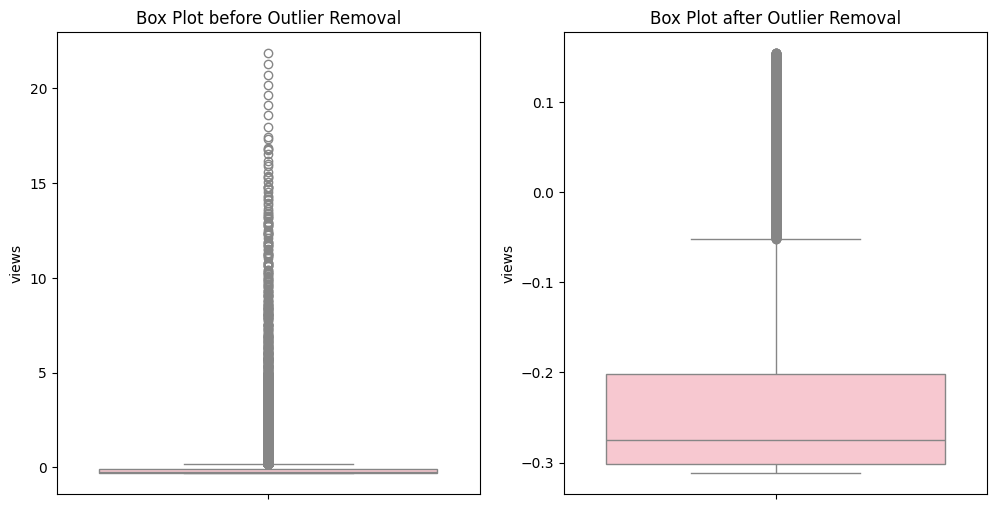

In [ ]:
#distribution of the data before and after outlier removal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=GB['views'], color ='pink')
plt.title('Box Plot before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['views'], color='pink')
plt.title('Box Plot after Outlier Removal')

**2. likes**

In [ ]:
threshold = 3
mean = GB['likes'].mean()
std = GB['likes'].std()

GB['outlier_flag'] = (GB['likes'] - mean).abs() > threshold * std

outliers = GB[GB['outlier_flag']]
print("Outliers:")
print(outliers)

Outliers:
          video_id trending_date  \
6      2Vv-BfVoq4g    2017-11-14   
225    2Vv-BfVoq4g    2017-11-15   
434    2Vv-BfVoq4g    2017-11-16   
677    2Vv-BfVoq4g    2017-11-17   
885    2Vv-BfVoq4g    2017-11-18   
...            ...           ...   
37883  D_6QmL6rExk    2018-06-13   
37885  xTlNMmZKwpA    2018-06-13   
38025  VY1eFxgRR-k    2018-06-14   
38057  D_6QmL6rExk    2018-06-14   
38058  xTlNMmZKwpA    2018-06-14   

                                                   title    channel_title  \
6            Ed Sheeran - Perfect (Official Music Video)       Ed Sheeran   
225          Ed Sheeran - Perfect (Official Music Video)       Ed Sheeran   
434          Ed Sheeran - Perfect (Official Music Video)       Ed Sheeran   
677          Ed Sheeran - Perfect (Official Music Video)       Ed Sheeran   
885          Ed Sheeran - Perfect (Official Music Video)       Ed Sheeran   
...                                                  ...              ...   
37883  BTS (방탄소년단)

In [ ]:
Q1 = GB['likes'].quantile(0.25)
Q3 = GB['likes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = GB[(GB['likes'] >= lower_bound) & (GB['likes'] <= upper_bound)]

Text(0.5, 1.0, 'Box Plot after Outlier Removal')

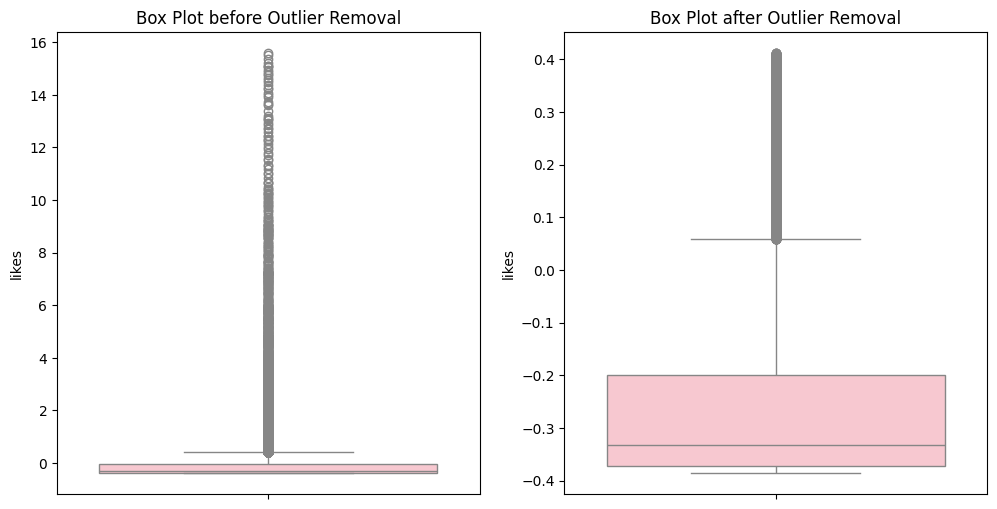

In [ ]:
#distribution of the data before and after outlier removal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=GB['likes'], color ='pink')
plt.title('Box Plot before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['likes'], color='pink')
plt.title('Box Plot after Outlier Removal')

**3. dislikes**

In [ ]:
threshold = 3
mean = GB['dislikes'].mean()
std = GB['dislikes'].std()

GB['outlier_flag'] = (GB['dislikes'] - mean).abs() > threshold * std

outliers = GB[GB['outlier_flag']]
print("Outliers:")
print(outliers)

Outliers:
          video_id trending_date  \
3536   TyHvyGVs42U    2017-12-01   
4525   FlsCjmMhFmw    2017-12-07   
4725   FlsCjmMhFmw    2017-12-08   
4925   FlsCjmMhFmw    2017-12-09   
5125   FlsCjmMhFmw    2017-12-10   
...            ...           ...   
36944  VYOjWnS4cMY    2018-06-07   
37115  VYOjWnS4cMY    2018-06-08   
37289  VYOjWnS4cMY    2018-06-09   
37465  VYOjWnS4cMY    2018-06-10   
37628  VYOjWnS4cMY    2018-06-11   

                                                   title        channel_title  \
3536           Luis Fonsi, Demi Lovato - Échame La Culpa        LuisFonsiVEVO   
4525   YouTube Rewind: The Shape of 2017 | #YouTubeRe...    YouTube Spotlight   
4725   YouTube Rewind: The Shape of 2017 | #YouTubeRe...    YouTube Spotlight   
4925   YouTube Rewind: The Shape of 2017 | #YouTubeRe...    YouTube Spotlight   
5125   YouTube Rewind: The Shape of 2017 | #YouTubeRe...    YouTube Spotlight   
...                                                  ...               

In [ ]:
Q1 = GB['dislikes'].quantile(0.25)
Q3 = GB['dislikes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = GB[(GB['dislikes'] >= lower_bound) & (GB['dislikes'] <= upper_bound)]

Text(0.5, 1.0, 'Box Plot after Outlier Removal')

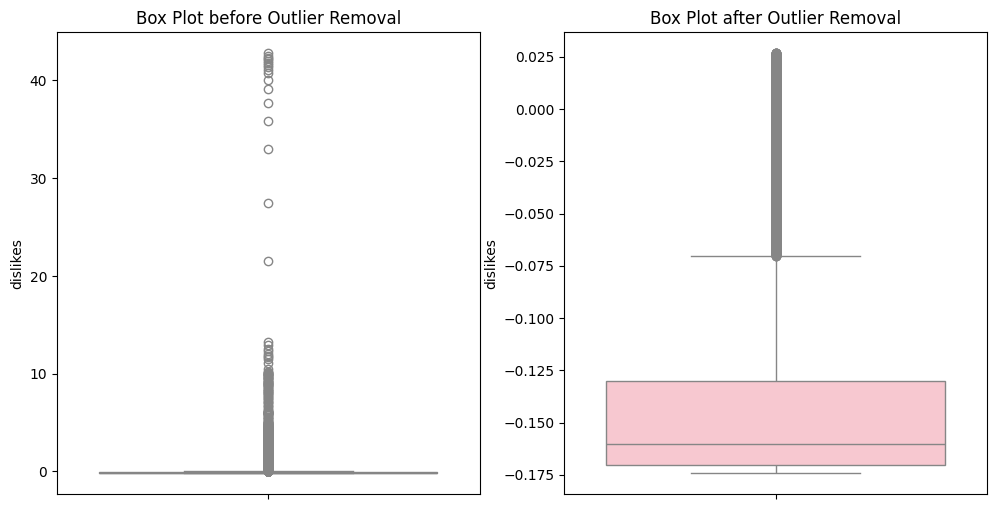

In [ ]:
#distribution of the data before and after outlier removal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=GB['dislikes'], color ='pink')
plt.title('Box Plot before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['dislikes'], color='pink')
plt.title('Box Plot after Outlier Removal')

**4. comment_count**

In [ ]:
threshold = 3
mean = GB['comment_count'].mean()
std = GB['comment_count'].std()

GB['outlier_flag'] = (GB['comment_count'] - mean).abs() > threshold * std

outliers = GB[GB['outlier_flag']]
print("Outliers:")
print(outliers)

Outliers:
          video_id trending_date  \
2177   kTlv5_Bs8aw    2017-11-25   
2374   kTlv5_Bs8aw    2017-11-26   
2572   kTlv5_Bs8aw    2017-11-27   
2795   kTlv5_Bs8aw    2017-11-28   
3021   kTlv5_Bs8aw    2017-11-29   
...            ...           ...   
37536  D_6QmL6rExk    2018-06-11   
37628  VYOjWnS4cMY    2018-06-11   
37706  D_6QmL6rExk    2018-06-12   
37883  D_6QmL6rExk    2018-06-13   
38057  D_6QmL6rExk    2018-06-14   

                                                   title        channel_title  \
2177   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...              ibighit   
2374   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...              ibighit   
2572   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...              ibighit   
2795   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...              ibighit   
3021   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...              ibighit   
...                                                  ...               

In [ ]:
Q1 = GB['comment_count'].quantile(0.25)
Q3 = GB['comment_count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = GB[(GB['comment_count'] >= lower_bound) & (GB['comment_count'] <= upper_bound)]

Text(0.5, 1.0, 'Box Plot after Outlier Removal')

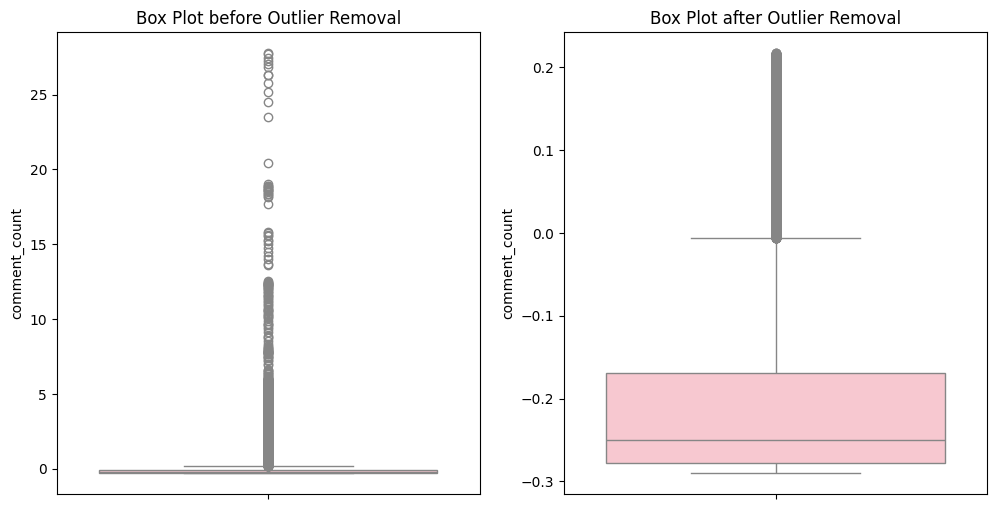

In [ ]:
#distribution of the data before and after outlier removal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=GB['comment_count'], color ='pink')
plt.title('Box Plot before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['comment_count'], color='pink')
plt.title('Box Plot after Outlier Removal')

In [ ]:
# Save the cleaned DataFrame to a new CSV file
GB.to_csv('cleaned_GBvideos.csv', index=False)

In [ ]:
import pandas as pd
df_cleaned = pd.read_csv('cleaned_GBvideos.csv')

In [ ]:
from google.colab import files
files.download('cleaned_GBvideos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>